In [1]:
# Alex Net for MNIST in pytorch

In [2]:
import torch
import torch.nn as nn
import torch.functional as F

In [32]:
class AlexNet(nn.Module):
    def __init__(self, num_out_classes):
        super().__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4), # (b, 96, 55, 55)
            nn.ReLU(),
            nn.LocalResponseNorm(size=5, alpha=1e-4, beta=0.75, k=2),   
            nn.MaxPool2d(kernel_size=3, stride=2) # (b, 96, 27, 27)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(96, 256, kernel_size=5, padding=2), # (b, 256, 27, 27)
            nn.ReLU(),
            nn.LocalResponseNorm(size=5, alpha=1e-4, beta=0.75, k=2),
            nn.MaxPool2d(kernel_size=3, stride=2) # (b, 256, 13, 13)
        )
        self.layer3 = nn.Sequential(
            nn.Conv2d(256, 384, kernel_size=3, padding=1), # (b, 384, 13, 13)
            nn.ReLU()
        )
        self.layer4 = nn.Sequential(
            nn.Conv2d(384, 384, kernel_size=3, padding=1), # (b, 384, 13, 13)
            nn.ReLU()
        )
        self.layer5 = nn.Sequential(
            nn.Conv2d(384, 256, kernel_size=3, padding=1), # (b, 256, 13, 13)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2) # (b, 256, 6, 6)
        )
        self.layer6 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(256*6*6, 4096),
            nn.ReLU()
        )
        self.layer7 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU()
        )
        self.layer8 = nn.Linear(4096, num_out_classes)

    def init_bias(self):
        # setting weights and biases of conv layers
        # layer 1
        nn.init.normal_(self.layer1[0].weight, mean=0, std=0.01)
        nn.init.constant_(self.layer1[0].bias, 0)
        # layer 2
        nn.init.normal_(self.layer2[0].weight, mean=0, std=0.01)
        nn.init.constant_(self.layer2[0].bias, 1)
        # layer 3
        nn.init.normal_(self.layer3[0].weight, mean=0, std=0.01)
        nn.init.constant_(self.layer3[0].bias, 0)
        # layer 4
        nn.init.normal_(self.layer4[0].weight, mean=0, std=0.01)
        nn.init.constant_(self.layer4[0].bias, 1)
        # layer 5
        nn.init.normal_(self.layer5[0].weight, mean=0, std=0.01)
        nn.init.constant_(self.layer5[0].bias, 1)
        # layer 6 - fully connected
        nn.init.constant_(self.layer6[1].bias, 1)
        # layer 7 - fully connected
        nn.init.constant_(self.layer7[1].bias, 1)
        # layer 8 - fully connected
        nn.init.constant_(self.layer8.bias, 1)

    def forward(self, X):
        X = self.layer1(X)
        print(X.shape)
        X = self.layer2(X)
        X = self.layer3(X)
        X = self.layer4(X)
        X = self.layer5(X)
        X = X.view(-1, 256*6*6)
        print(X.shape)
        X = self.layer6(X)
        X = self.layer7(X)
        logits = self.layer8(X)
        return logits

# Notes
- We would take input shape as 227 * 227, but the input shape in paper is 224*224, we would do this because 224*224 doesn't output the filter map in the shape 55*55 which is mentioned in the paper
- We would take padding from layer 2 to layer 5 in conv. layer to match the output size given in paper, for layer 2 it is 27*27

In [33]:
model = AlexNet(num_out_classes=1000)
print(model)

AlexNet(
  (layer1): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4))
    (1): ReLU()
    (2): LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=2)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=2)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (layer4): Sequential(
    (0): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (layer5): Sequential(
    (0): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer6): Sequential(
    (0):

In [35]:
import torchvision
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor

In [39]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize(256),
    torchvision.transforms.CenterCrop(227),
    torchvision.transforms.ToTensor()
])

In [12]:
training_data = CIFAR10(
    root="data",
    train=True, 
    transform=transform,
    download=True
)
test_data = CIFAR10(
    root="data",
    train=True, 
    transform=transform,
    download=True
)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 170498071/170498071 [16:02<00:00, 177091.80it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


AxesImage(shape=(32, 32, 3))


(32, 32, 3)

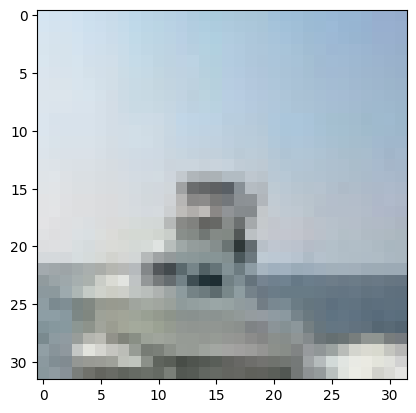

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
print(plt.imshow(training_data.data[100]))
training_data.data[0].shape

In [38]:
batch_size = 128
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

# the data is converted into 256 batches
for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([128, 3, 32, 32])
Shape of y: torch.Size([128]) torch.int64


In [24]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.0005)
loss_fn = nn.CrossEntropyLoss()

In [30]:
def train(dataloader, model, loss_fn, optimizer):
    losses = []
    model.train()
    size = len(dataloader.dataset)
    for i, (X,y) in enumerate(dataloader):
        # Forward pass
        output = model(X)
        loss = loss_fn(output, y)

        # Backward pass
        model.zero_grad()
        loss.backward()
        optimizer.step()
        
        losses.append(loss.item())
        if i%10 == 0:
            print(f"loss at {i} = {loss.item()}")

In [34]:
epochs = 20
for t in range(epochs):
    train(train_dataloader, model, loss_fn, optimizer)

torch.Size([128, 96, 2, 2])


RuntimeError: Given input size: (256x2x2). Calculated output size: (256x0x0). Output size is too small